# Acid-Base Equilibria

## Table of contents
1. [Speciation and the Henderson–Hasselbalch equation](#speciation)
2. [pH of a monoprotic acid](#monoprotic)
3. [Titrating a monoprotic acid](#monotitration)
4. [Buffer capacities](#buffer)
5. [Polyprotic acids](#polyprotic)

## Speciation and the Henderson–Hasselbalch equation <a name="speciation"></a>

For a monoprotic acid,
$$ \mathrm{pH} = \mathrm{p}K_\mathrm{a} + \log_{10} \left( \frac{[\mathrm{A}^{-}]}{[\mathrm{HA}]} \right) $$
and in general
$$ k \cdot \mathrm{pH} = \mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},k} + \log_{10} \left( \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{[\mathrm{H}_n\mathrm{A}]} \right) $$

Then the ratio of a particular acid species relative to the total concentration as a function of pH is
$$ \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{c_a} = \frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{\sum_{j=0}^{n}
[\mathrm{H}_{n-j}\mathrm{A}^{j-}]} = \frac{\frac{[\mathrm{H}_{n-k}\mathrm{A}^{k-}]}{[\mathrm{H}_n\mathrm{A}]}}{1 +\sum_{j=1}^{n}
\frac{[\mathrm{H}_{n-j}\mathrm{A}^{j-}]}{[\mathrm{H}_n\mathrm{A}]}} = \frac{
 10^{k\cdot\mathrm{pH} - (\mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},k})}
}{
1 + \sum_{j=1}^{n} 10^{j\cdot\mathrm{pH} - (\mathrm{p}K_{\mathrm{a},1} + \ldots + \mathrm{p}K_{\mathrm{a},j})}
}$$
which can be visualised on a speciation diagram.

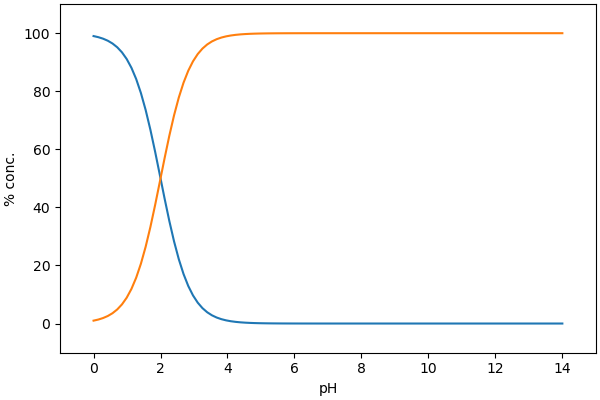

In [1]:
%matplotlib widget
import warnings
from acidbase import speciation
warnings.filterwarnings("ignore")
speciation.main();

## pH of a monoprotic acid <a name="monoprotic"></a>

In this setup, we know the total concentration of the acid in various states of ionisation, $c_a$, the acid dissociation constant, $K_a$, and the water ionisation constant $K_w = 10^{-14}$. The unknown quantities are the equilibrium concentrations $[\mathrm{HA}]$, $[\mathrm{A}^{-}]$, 
$[\mathrm{OH}^{-}]$, and $[\mathrm{H}^{+}]$. To solve for the four unknowns, we set up a system of four equations:

$$
\begin{cases}
K_a = \tfrac{[\mathrm{H}^{+}] [\mathrm{A}^{-}]}{[\mathrm{HA}]} & \text{acid dissociation constant} \\
\rule[-0.25em]{0pt}{1.25em}
K_w = [\mathrm{H}^{+}] [\mathrm{OH}^{-}] & \text{water self-ionisation} \\
\rule[-0.25em]{0pt}{1.5em}
c_a / c^{\circ} = [\mathrm{HA}] + [\mathrm{A}^{-}] & \text{mass balance} \\
\rule{0pt}{1.25em}
[\mathrm{H}^{+}] = [\mathrm{OH}^{-}] + [\mathrm{A}^{-}] & \text{charge balance}
\end{cases}
$$

We can then eliminate all the unknowns except for $[\mathrm{H}^{+}]$, leaving us with the cubic equation

$$
[\mathrm{H}^{+}]^3 + K_a [\mathrm{H}^{+}]^2 - \left( 
K_w + K_a \dfrac{c_a}{c^\circ}
\right) [\mathrm{H}^{+}] - K_a K_w = 0
$$

that can be solved for $[\mathrm{H}^{+}]$ numerically.

In [2]:
from acidbase import monoprotic
monoprotic.main();

interactive(children=(FloatText(value=0.001, description='\\(c_{\\mathrm{a}} / \\mathrm{M}\\)', step=0.0001), …

## Titrating a monoprotic acid <a name="monotitration"></a>

Let us now suppose that apart from the monoprotic acid, our solution contains a strong base $\mathrm{BOH}$ that is essentially fully ionised, $\mathrm{BOH} \to \mathrm{B}^{+} + \mathrm{OH}^{-}$. The total concentration of the base
$c_b = [\mathrm{B}^{+}] + [\mathrm{BOH}] \approx [\mathrm{B}^{+}]$ is given, so that we have the same four unknowns as in the previous section, and the only modification is to the charge-balance equation:

$$
\begin{cases}
K_a = \tfrac{[\mathrm{H}^{+}] [\mathrm{A}^{-}]}{[\mathrm{HA}]} & \text{acid dissociation constant} \\
\rule[-0.25em]{0pt}{1.25em}
K_w = [\mathrm{H}^{+}] [\mathrm{OH}^{-}] & \text{water self-ionisation} \\
\rule[-0.25em]{0pt}{1.5em}
c_a / c^{\circ} = [\mathrm{HA}] + [\mathrm{A}^{-}] & \text{mass balance} \\
\rule{0pt}{1.25em}
[\mathrm{H}^{+}] + [\mathrm{B}^{+}] = [\mathrm{OH}^{-}] + [\mathrm{A}^{-}] & \text{charge balance}
\end{cases}
$$

This leads to the following new cubic equation for $[\mathrm{H}^{+}]$,

$$
[\mathrm{H}^{+}]^3 + \left( K_a + \dfrac{c_b}{c^\circ} \right) [\mathrm{H}^{+}]^2 - \left( 
K_w + K_a \dfrac{c_a}{c^\circ} -  K_a \dfrac{c_b}{c^\circ}
\right) [\mathrm{H}^{+}] - K_a K_w = 0
$$

To complete the description of a titration experiment, we express the _current_ concentrations of acid and base-derived species in terms of the amount of the analyte, $n_a$, the initial volume of its solution, $V_i$, the concentration of base in the standard solution, $C$, and volume of the titrand that has been added so far, $V_t$. This gives

$$
c_a = \dfrac{n_a}{V_i + V_t} \qquad c_b = \dfrac{C \cdot V_t}{V_i + V_t} 
$$

which we can use to construct and solve the cubic equation from above. Below you can set up and plot the corresponding titration curve. **Note:** the maximum value of the volume added is capped at $50~\mathrm{cm}^3$, so make sure to choose sensible values of $n_a$ and $C$. The equivalence point is shown with a soild vertical line and the corresponding pH with a horizontal line.

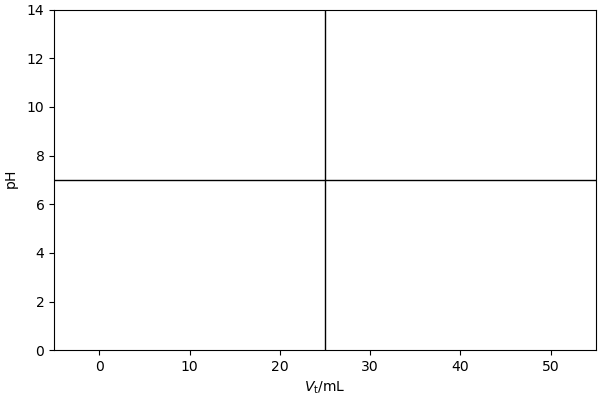

In [3]:
from acidbase import monotitration
monotitration.main();

## Buffer capacities <a name="buffer"></a>

We can turn the plot from the previous section on its side to see how much strong base has to be added to an acid solution in order to change its pH by a specified amount. Below is shown a plot for a 0.01-molar solution of a strong acid ($\mathrm{pK_a} = -7)$, from which we see that the concentration of the base must become comparable to the concentration of the acid before any appreciable change in pH can occur. However, once $c_b \approx c_a$, a tiny amount of additional base can cause the pH to jump by several units (which corresponds to $[\mathrm{H}^{+}]$ changing by several orders of magnitude), with the jump centred on pH = 7. This can be undesirable for systems that are highly sensitive to the concentration of $\mathrm{H}^{+}$.

<p float="center">
  <img src="buffer_strong.png" width="400" />
</p>

Contrast this with the behaviour of a week acid ($\mathrm{pK_a} = +7$; note change in the x-axis scale). The range of pH that was previously highly sensitive to the amount of added base is now broken up, such that the response around $\mathrm{pH} \approx \mathrm{pK_a}$ is much more gentle. The weak acid acts as a "buffer" that slows the change in the acidity of a solution.

<p float="center">
  <img src="buffer_weak.png" width="400" />
</p>

This is quantified by the buffer capacity $ \beta = \dfrac{\mathrm{d}(c_b/c^{\circ})}{\mathrm{d}(\mathrm{pH})}, $ which is just the slope of the above graph. To calculate $\beta$, we can rearrange the charge-balance equation as

$$
c_b / c^{\circ}  = [\mathrm{OH}^{-}] + [\mathrm{A}^{-}] - [\mathrm{H}^{+}] = \dfrac{K_w}{[\mathrm{H}^{+}]} + \dfrac{c_a K_a}{[\mathrm{H}^{+}] + K_a} - [\mathrm{H}^{+}] 
$$

and differentiate with respect to pH, making use of the chain rule

$$
\dfrac{\mathrm{d}(\mathrm{pH})}{\mathrm{d}[\mathrm{H}^{+}]} = -\dfrac{1}{\ln \! 10 \cdot [\mathrm{H}^{+}]} \quad \Rightarrow \quad
\dfrac{\mathrm{d}[\mathrm{H}^{+}]}{\mathrm{d}(\mathrm{pH})} = -\ln \! 10 \cdot [\mathrm{H}^{+}]
$$

so that

$$
\beta = \ln \! 10 \, \left(
\dfrac{K_w}{[\mathrm{H}^{+}]} + \dfrac{c_a K_a [\mathrm{H}^{+}]}{([\mathrm{H}^{+}] + K_a)^2} + [\mathrm{H}^{+}] 
\right).
$$

You can use the interactive plot below to explore how this quantity changes with acid strength and concentration.

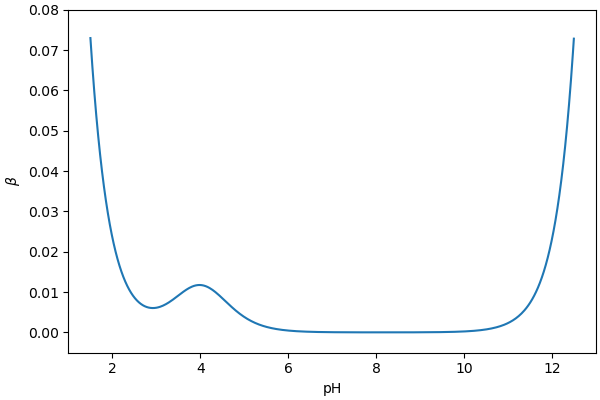

In [4]:
from acidbase import buffer
buffer.main();

## Polyprotic acids <a name="polyprotic"></a>

All the preceding sections can be generalised to polyprotic acids. Here, we limit ourselves to the pH of pure acid solutions (titration curves and buffer capacities are left as exercises for the interested reader). 
Given an $n$-protic acid, the unknown quantities $[\mathrm{H}_{n}\mathrm{A}]$,
$[\mathrm{H}_{n-1}\mathrm{A}^{-}],\, \ldots,\, [\mathrm{H}\mathrm{A}^{(n-1)-}], \, 
[\mathrm{A}^{n-}]$, as well as $[\mathrm{OH}^{-}]$ and $[\mathrm{H}^{+}]$. The corresponding system of equations is:

$$
\begin{cases}
\kappa_1 = K_{a,1} = \tfrac{[\mathrm{H}^{+}] [\mathrm{H}_{n-1}\mathrm{A}^{-}]}{[\mathrm{H}_{n}\mathrm{A}]} & \text{first dissociation constant} \\
\ldots & \\
\kappa_j = K_{a,1}K_{a,2}\cdots K_{a,j} = \tfrac{[\mathrm{H}^{+}]^{j} [\mathrm{H}_{n-j}\mathrm{A}^{j-}]}{[\mathrm{H}_{n}\mathrm{A}]} & j\text{-th dissociation constant} \\
\ldots & \\
\rule[-0.25em]{0pt}{1.25em}
K_w = [\mathrm{H}^{+}] [\mathrm{OH}^{-}] & \text{water self-ionisation} \\
\rule[-0.25em]{0pt}{1.5em}
c_a / c^{\circ} = [\mathrm{HA}] + [\mathrm{A}^{-}] & \text{mass balance} \\
\rule{0pt}{1.25em}
[\mathrm{H}^{+}] = [\mathrm{OH}^{-}] + \sum_{j=1}^{n} j \cdot [\mathrm{H}_{n-j}\mathrm{A}^{j-}] & \text{charge balance}
\end{cases}
$$

As before, we can eliminate all unknowns except $[\mathrm{H}^{+}]$, resulting in an equation of order $n+2$,

$$
\sum_{j=0}^{n+2} d_j [\mathrm{H}^{+}]^{(n+2-j)} = 0, \qquad d_j = \kappa_{j} - (j-1) \cdot \dfrac{c_a}{c^{\circ}} \kappa_{j-1} - K_{w} \kappa_{j-2}
$$

where 

$$
\kappa_j = \begin{cases}
K_{a,1}K_{a,2}\cdots K_{a,j} &  1 \leq j \leq n \\
1 & j = 0 \\
0 & \text{otherwise}
\end{cases}
$$

This can be solved numerically to yield the pH. You can explore the pH of different polyprotic acid solutions below, by specifying the $\mathrm{p}K_\mathrm{a}$ values in comma separated format (_e.g._, for sulphuric acid `-2, 1.99`) and pressing `Calculate pH`.

In [5]:
from acidbase import polyprotic
polyprotic.main();

interactive(children=(FloatText(value=0.001, description='\\(c_{\\mathrm{a}} / \\mathrm{M}\\)', step=0.0001), …